In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('./input/Placement_Data_Full_Class.csv')

In [3]:
df.drop(['sl_no'], axis=1, inplace=True)

In [4]:
df['status'].values[df['status'] == 'Not Placed'] = 0
df['status'].values[df['status'] == 'Placed'] = 1
df.status = df.status.astype('int')

In [5]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


<AxesSubplot:>

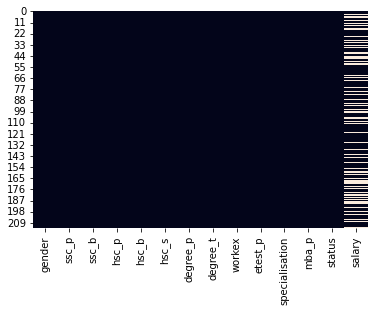

In [6]:
sns.heatmap(df.isnull(), cbar=False)

In [7]:
df['salary'] = df['salary'].replace(np.nan, 0)

In [8]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,940000.000000


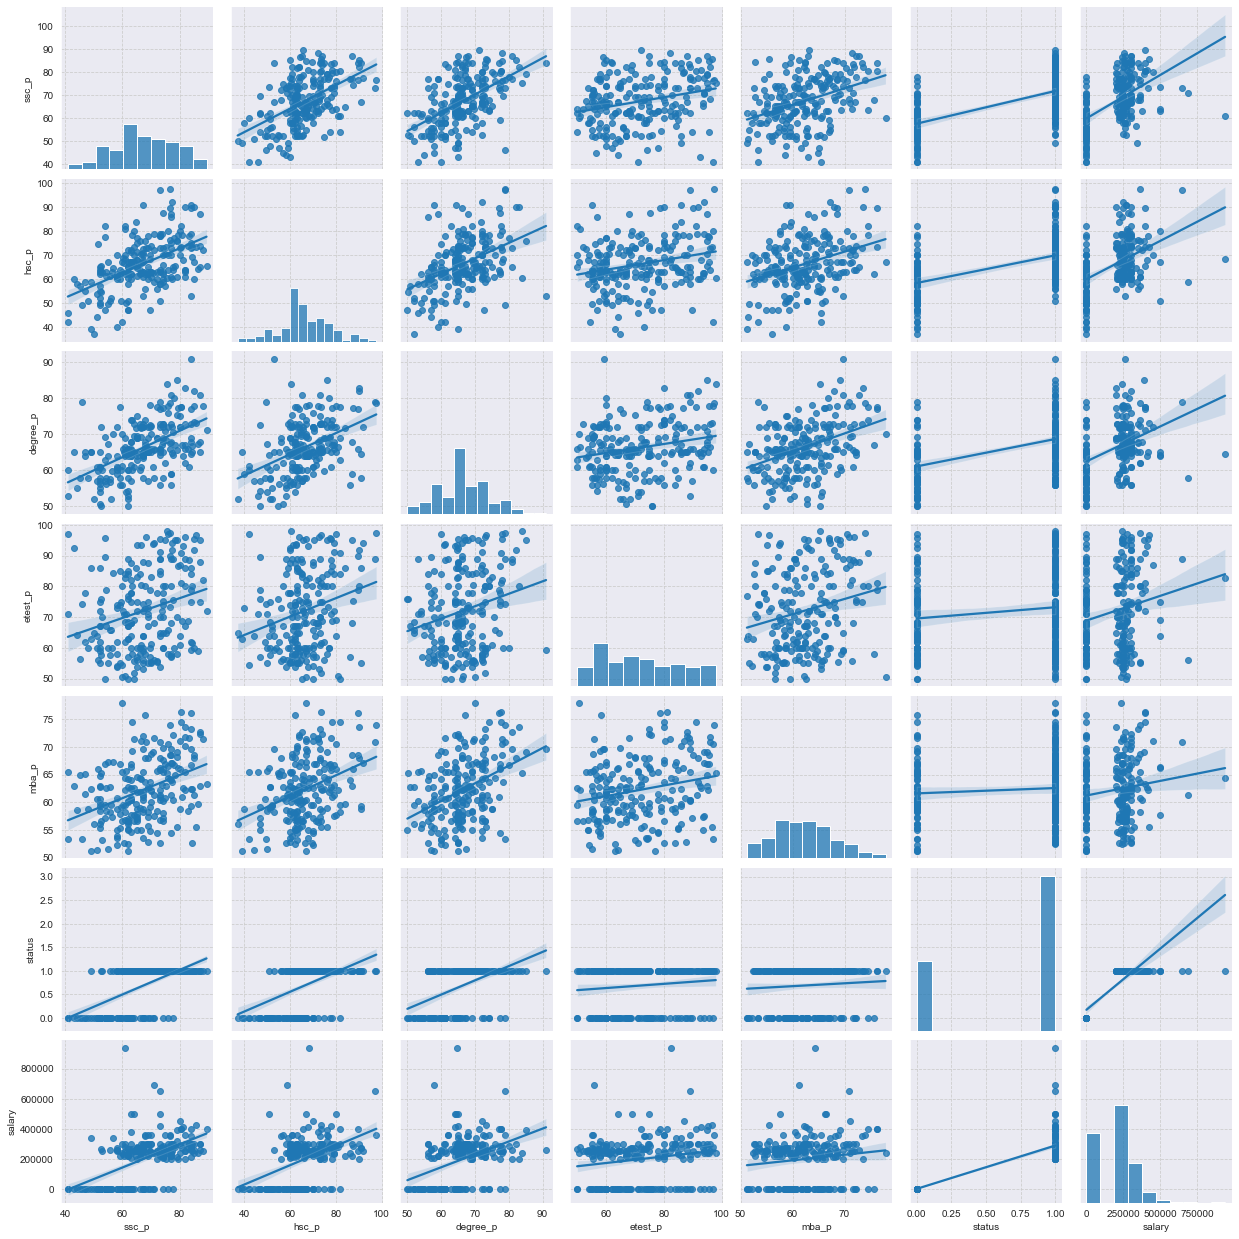

In [9]:
sns.set_style(style='darkgrid', rc={'grid.color':'.8', 'grid.linestyle':'--'})
sns.pairplot(df, kind='reg')
plt.show()

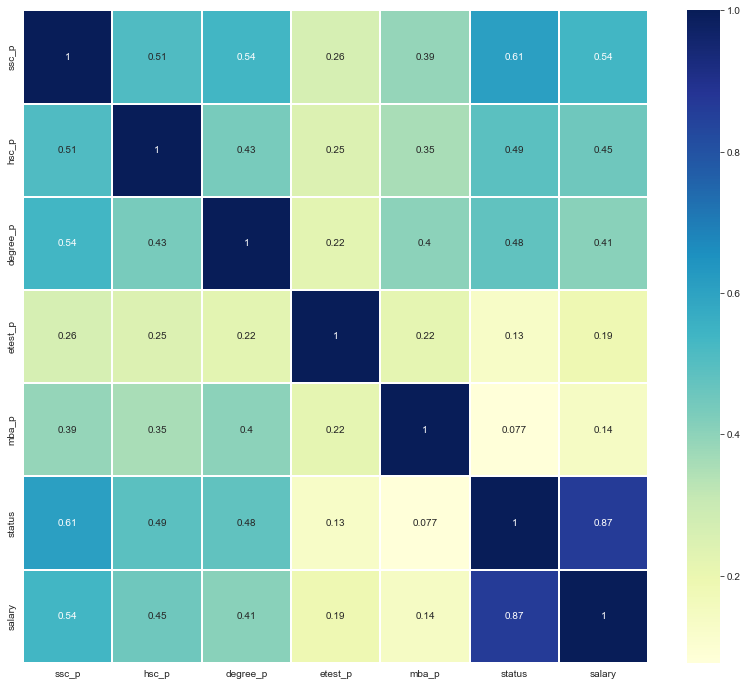

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidth=0.2, cmap='YlGnBu', annot=True)
plt.show()

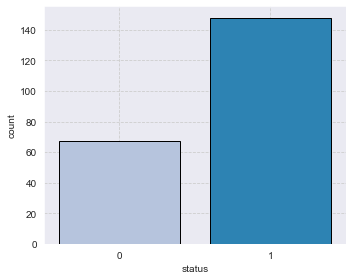

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(df['status'], palette='PuBu', saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

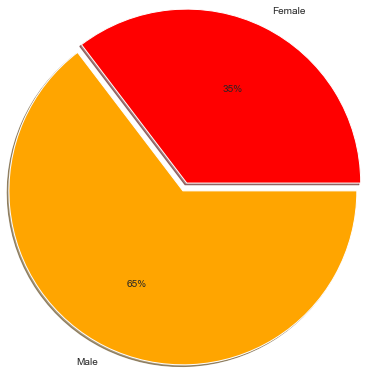

In [13]:
out_df = pd.DataFrame(df.groupby('gender')['gender'].count())
colors = ['red', 'orange']
plt.pie(out_df['gender'], labels=['Female', 'Male'], autopct='%.0f%%', colors=colors, radius=2, explode=(0, 0.1), shadow=True)
plt.show()

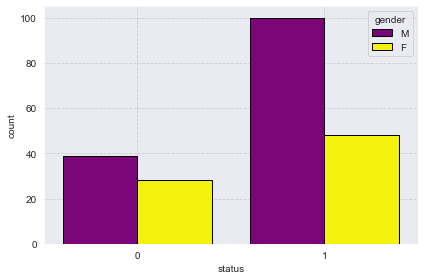

In [14]:
sns.countplot(df['status'], hue=df['gender'], palette=['purple', 'yellow'], saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [15]:
Boys_placed = 100
Total_Boys = 140
Boys_placed_prob = Boys_placed / Total_Boys

Girls_placed = 50
Total_Girls = 70
Girls_placed_prob = Girls_placed / Total_Boys

print('Boys prob: ', Boys_placed_prob)
print('Girls prob: ', Girls_placed_prob)

Boys prob:  0.7142857142857143
Girls prob:  0.35714285714285715


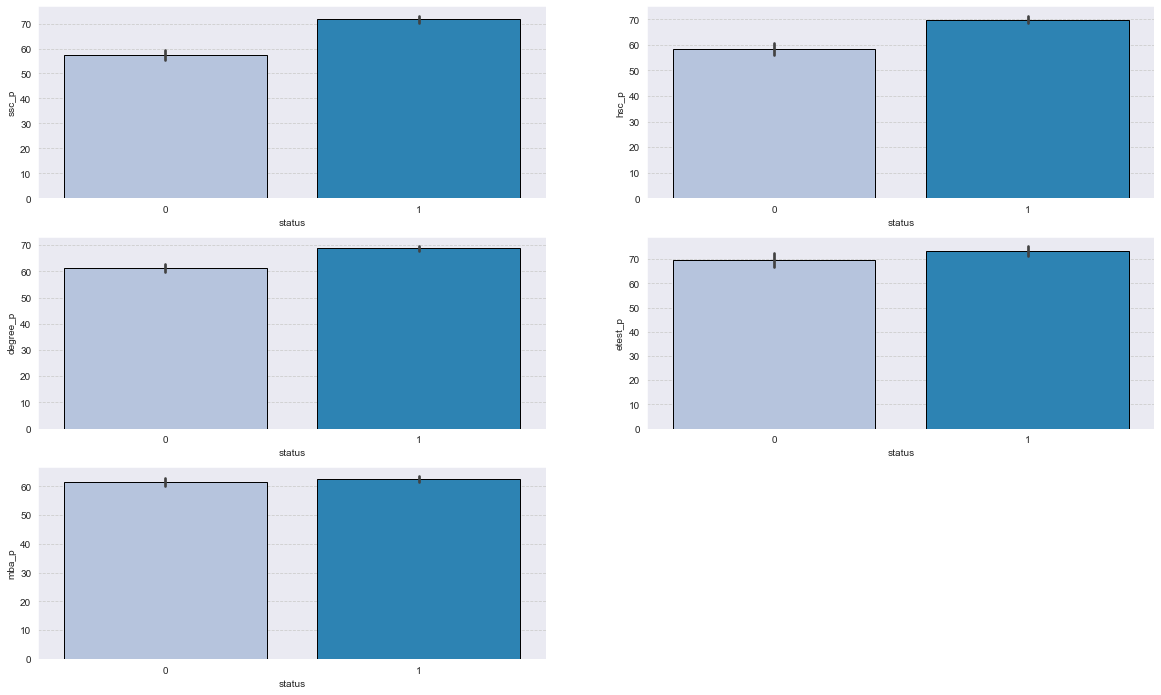

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(20,12))
sns.barplot(x='status', y='ssc_p', data=df, ax=axes[0][0], palette='PuBu', saturation=0.9, edgecolor='black')
sns.barplot(x='status', y='hsc_p', data=df, ax=axes[0][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='degree_p',data=df, ax=axes[1][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='etest_p',data=df, ax=axes[1][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='mba_p', data=df, ax=axes[2][0],palette='PuBu',saturation=0.9,edgecolor="black")
fig.delaxes(ax = axes[2][1]) 

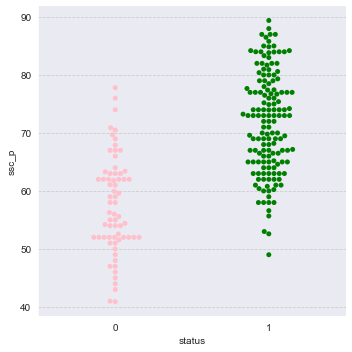

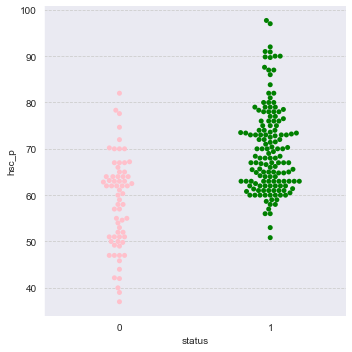

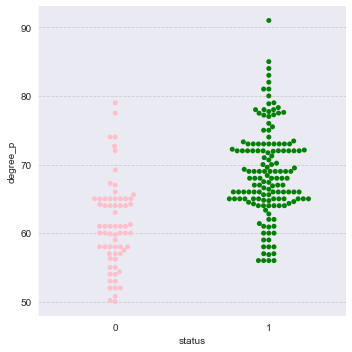

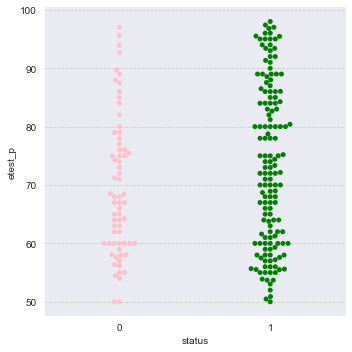

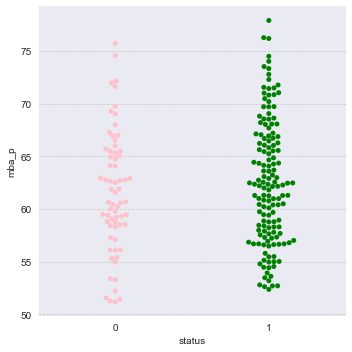

In [17]:
sns.catplot(x='status', y='ssc_p', data=df, kind='swarm', palette=['pink', 'green'])
sns.catplot(x='status', y='hsc_p', data=df, kind='swarm', palette=['pink', 'green'])
sns.catplot(x='status', y='degree_p', data=df, kind='swarm', palette=['pink', 'green'])
sns.catplot(x='status', y='etest_p', data=df, kind='swarm', palette=['pink', 'green'])
sns.catplot(x='status', y='mba_p', data=df, kind='swarm', palette=['pink', 'green'])

In [18]:
df.groupby(['workex', 'status']).count()['salary']

workex  status
No      0         57
        1         84
Yes     0         10
        1         64
Name: salary, dtype: int64

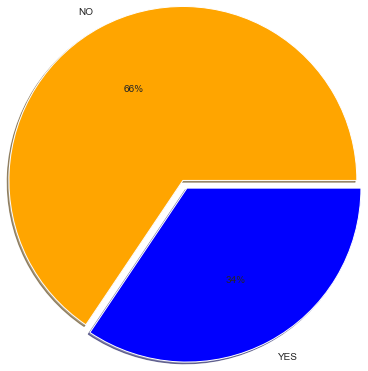

In [20]:
out_df = pd.DataFrame(df.groupby('workex')['workex'].count())
colors = ['orange', 'blue']
plt.pie(out_df['workex'], labels=['NO', 'YES'], autopct='%.0f%%', colors=colors, radius=2, explode=(0, 0.1), shadow=True)
plt.show()

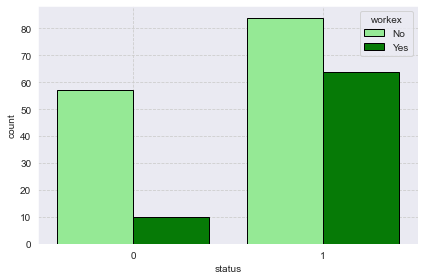

In [21]:
sns.countplot(df['status'], hue=df['workex'], palette=['lightgreen', 'green'], saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
Y_placed = 64
Total_Y = 74
Y_placed_prob = Y_placed / Total_Y

N_placed = 84
Total_N = 141
N_placed_prob = N_placed / Total_N

print('Students with work exp prob: ', Y_placed_prob)
print('Students without work exp prob: ', N_placed_prob)

Students with work exp prob:  0.8648648648648649
Students without work exp prob:  0.5957446808510638


In [23]:
df.groupby(['specialisation', 'status']).count()['salary']

specialisation  status
Mkt&Fin         0         25
                1         95
Mkt&HR          0         42
                1         53
Name: salary, dtype: int64

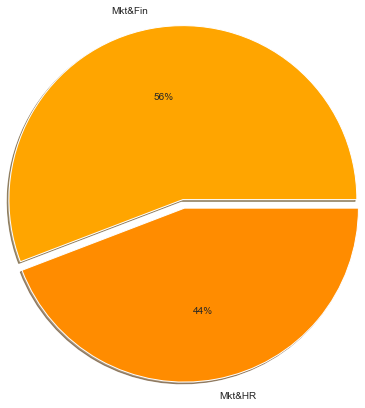

In [24]:
out_df = pd.DataFrame(df.groupby('specialisation')['specialisation'].count())
colors = ['orange', 'darkorange']
plt.pie(out_df['specialisation'], labels=['Mkt&Fin', 'Mkt&HR'], autopct='%.0f%%', colors=colors, radius=2, explode=(0, 0.1), shadow=True)
plt.show()

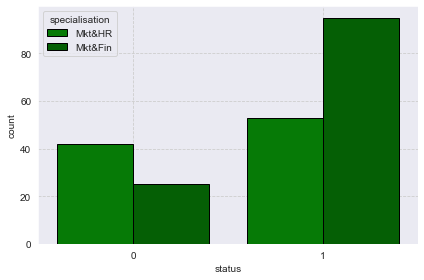

In [25]:
sns.countplot(df['status'], hue=df['specialisation'], palette=['green', 'darkgreen'], saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [26]:
MH_placed = 53
Total_MH = 95
MH_placed_prob = MH_placed / Total_MH

MF_placed = 95
Total_MF = 120
MF_placed_prob = MF_placed / Total_MF

print('Market HR Students: ', MH_placed_prob)
print('Market Finance Students: ', MF_placed_prob)

Market HR Students:  0.5578947368421052
Market Finance Students:  0.7916666666666666


In [28]:
df.groupby(['ssc_b', 'status']).count()['salary']

ssc_b    status
Central  0         38
         1         78
Others   0         29
         1         70
Name: salary, dtype: int64

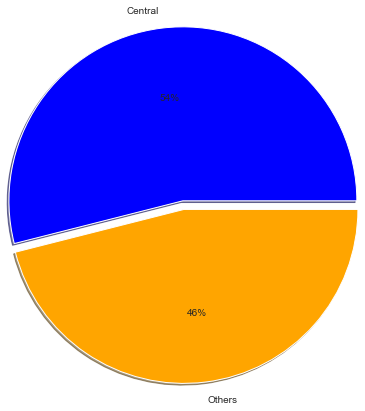

In [30]:
out_df = pd.DataFrame(df.groupby('ssc_b')['ssc_b'].count())
colors = ['blue', 'orange']
plt.pie(out_df['ssc_b'], labels=['Central', 'Others'], autopct='%.0f%%', colors=colors, radius=2, explode=(0, 0.1), shadow=True)
plt.show()

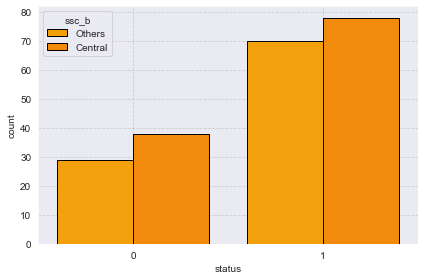

In [31]:
sns.countplot(df['status'], hue=df['ssc_b'], palette=['orange', 'darkorange'], saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [32]:
print(f'Central board Students prob: {78/(78+38)}')
print(f'Other board Students prob: {70/(70+29)}')

Central board Students prob: 0.6724137931034483
Other board Students prob: 0.7070707070707071


In [33]:
df.groupby(['hsc_b', 'status']).count()['salary']

hsc_b    status
Central  0         27
         1         57
Others   0         40
         1         91
Name: salary, dtype: int64

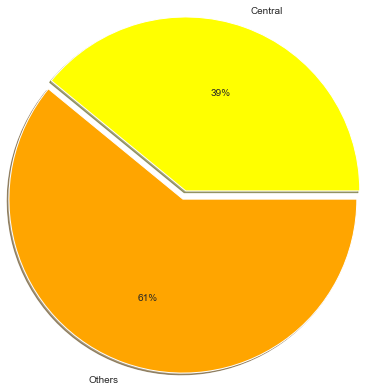

In [35]:
out_df = pd.DataFrame(df.groupby('hsc_b')['hsc_b'].count())
colors = ['yellow', 'orange']
plt.pie(out_df['hsc_b'], labels=['Central', 'Others'], autopct='%.0f%%', colors=colors, radius=2, explode=(0, 0.1), shadow=True)
plt.show()

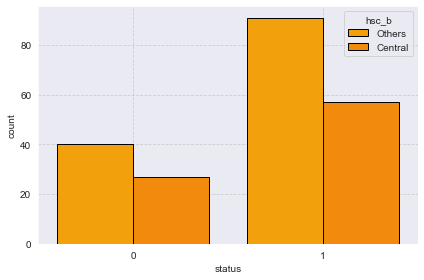

In [36]:
sns.countplot(df['status'], hue=df['hsc_b'], palette=['orange', 'darkorange'], saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [37]:
print(f'Proportion of student having central board in HSC got placed: {57/(57+27)}')
print(f'Proportion of students having other board in HSC got placed: {91/(91+40)}')

Proportion of student having central board in HSC got placed: 0.6785714285714286
Proportion of students having other board in HSC got placed: 0.6946564885496184


In [38]:
df.groupby(['hsc_s', 'status']).count()['salary']

hsc_s     status
Arts      0          5
          1          6
Commerce  0         34
          1         79
Science   0         28
          1         63
Name: salary, dtype: int64

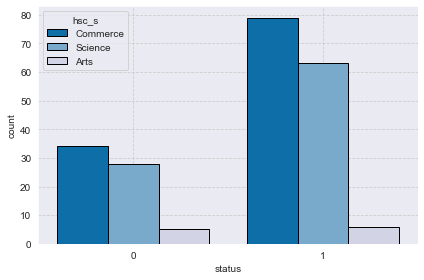

In [40]:
sns.countplot(df['status'], hue=df['hsc_s'], palette='PuBu_r', saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [41]:
print(f'Proportion of commerce student got placed: {79/(79+34)}')
print(f'Proportion of science students got placed: {63/(63+28)}')

Proportion of commerce student got placed: 0.6991150442477876
Proportion of science students got placed: 0.6923076923076923


In [42]:
df.groupby(['degree_t', 'status']).count()['salary']

degree_t   status
Comm&Mgmt  0          43
           1         102
Others     0           6
           1           5
Sci&Tech   0          18
           1          41
Name: salary, dtype: int64

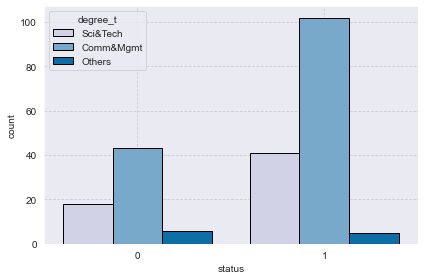

In [43]:
sns.countplot(df['status'], hue=df['degree_t'], palette='PuBu', saturation=0.9, edgecolor='black')
plt.tight_layout()
plt.grid(True)
plt.show()

In [44]:
print(f'Proportion of Comm&Mgmt student got placed: {102/(102+43)}')
print(f'Proportion of Sci&Tech students got placed: {41/(41+18)}')

Proportion of Comm&Mgmt student got placed: 0.7034482758620689
Proportion of Sci&Tech students got placed: 0.6949152542372882
